In [8]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
from random import sample
import pandas as pd

In [54]:
v= np.matrix([[1,2,3],[4,5,6],[7,8,9]])
v[:,2]
#np.matrix([[1, 2], [3, 4]])

matrix([[3],
        [6],
        [9]])

### Note: Please enter your directory path name into path file

In [15]:
import pandas as pd
import os
#path='/Users/nirjapatel/MyFolder/PythonProgramming/Assignments/congressional-election-disbursements/'
#ds1=pd.read_csv(path+'all_house_senate_2010.csv')
#ds2=pd.read_csv(path+'all_house_senate_2012.csv')
#ds3=pd.read_csv(path+'all_house_senate_2014.csv')

import os
path='/Users/nirjapatel/MyFolder/PythonProgramming/Assignments/congressional-election-expenditures/'
os.chdir(path)
files=!ls *.csv

bigframe = pd.DataFrame()

for fl in files:
    if(fl!='metadata.csv'):
        print('file read in this frame: '+fl)
        df=pd.read_csv(path+fl, encoding='ISO-8859-1')
        bigframe =bigframe.append(df)

file read in this frame: 2012.csv
file read in this frame: all_house_senate_2010.csv


/Users/nirjapatel/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file read in this frame: all_house_senate_2014.csv


/Users/nirjapatel/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


file read in this frame: all_house_senate_2016.csv


/Users/nirjapatel/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
print('total number of rows loaded: '+ str (len(bigframe)))

total number of rows loaded: 3327922


In [20]:
#drop dunplicate rows from dataframe
bigframe = bigframe.drop_duplicates()

In [32]:
#number or sample rows as per industry standards 20% as discussed in class
sampleSize=int(len(bigframe)*20/100)
sampleSize

664769

In [30]:
#check if data load correctly as csv files
bigframe.head(5)

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00012229,ALASKANS FOR DON YOUNG,H6AK00045,"YOUNG, DONALD E",2012,H,AK,1.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129713...,...,99503,2012-04-12,$100.00,OFFICE SNOW PLOWING,NaN,OFFICE SNOW PLOWING,NaN,NaN,20620.E11576,NaN
1,C00116632,HAL ROGERS FOR CONGRESS,H0KY05015,"ROGERS, HAROLD DALLAS",2012,H,KY,5.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129503...,...,40511,2011-12-21,"$4,491.01",CATERING/LODGING,NaN,NaN,NaN,NaN,D184-00BL0D,NaN
2,C00116632,HAL ROGERS FOR CONGRESS,H0KY05015,"ROGERS, HAROLD DALLAS",2012,H,KY,5.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129503...,...,20001,2011-10-12,"$1,400.40","* IN-KIND->CATERING, RM RENTAL, STAF",NaN,NaN,NaN,NaN,D339-01MU01,NaN
3,C00412312,KANSAFORNIAN PAC,H6CA48039,"CAMPBELL, JOHN BT III",2012,H,CA,45.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?139609...,...,927055646,2012-09-26,"$5,000.00",SLATE APPERANCE FOR PROPOSITIO,NaN,NaN,NaN,NaN,B-E-14419,NaN
4,C00410118,BACHMANN FOR CONGRESS,P20002978,"BACHMANN, MICHELE",2012,P,US,0.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129514...,...,940431307,2012-03-02,$59.95,FUNDRAISING: CREDIT CARD FEES,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-504262,NaN


In [34]:
#sampling without replacement
#reference: https://chrisalbon.com/python/pandas_sampling_dataframe.html
sampledDataframe=bigframe.take(np.random.permutation(len(bigframe))[:sampleSize])

#sample dataframe size
print('total number of rows loaded: '+ str (len(sampledDataframe)))

total number of rows loaded: 664769


In [36]:
#sampledDataframe.head(5)

In [40]:
#Remove dollar sign and commas from disbursement amount and conveted it to float
sampledDataframe['dis_amo']=sampledDataframe['dis_amo'].replace( '[\$,)]','', regex=True ).astype(float)

/Users/nirjapatel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
import seaborn as sns
%matplotlib inline

In [47]:
import plotly 
#added plotly account details for online access
plotly.tools.set_credentials_file(username='nirja.patel', api_key='9091fa0wru')
plotly.tools.set_config_file(world_readable=True,sharing='public')

In [55]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
from plotly import tools
#import plotly.plotly as py
#import plotly.graph_objs as go

from scipy import special

#set up plotly on offline mode
py.offline.init_notebook_mode(connected=True)

In [56]:
#set up plotly on offline mode
py.offline.init_notebook_mode(connected=True)

In [69]:
#Visualization: 1 starts


#yearly total/average count for committees, candidates, recepients and disbursement amount
yearBasedAllCountDF = (sampledDataframe.groupby('ele_yea').agg({'com_id':'count','can_id':'count','rec_com_id':'count','dis_amo': 'mean'}).reset_index().copy())

In [68]:
#Year based data
yearBasedAllCountDF

,ele_yea,com_id,can_id,rec_com_id,dis_amo
0,2010,174914,174914,10236,2248.460457
1,2012,173218,173218,3362,2301.865431
2,2014,157515,157515,2571,2135.870904
3,2016,159122,159122,2170,2314.997427


#### Visualization: 1

In [90]:
trace1 = go.Bar(
    x=yearBasedAllCountDF['ele_yea'],
    y=yearBasedAllCountDF['com_id'],
    name='Number of Committees',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)
trace2 = go.Bar(
    x=yearBasedAllCountDF['ele_yea'],
    y=yearBasedAllCountDF['rec_com_id'],
    name='Number of Recipients',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)
trace3 = go.Bar(
    x=yearBasedAllCountDF['ele_yea'],
    y=yearBasedAllCountDF['can_id'],
    name='Number of Candidates',
    marker=dict(
        color='rgba(255, 153, 153)',
        line=dict(
            color='rgba(204,204,204)',
            width=1.5),
        ),
    opacity=0.6
)
trace4 = go.Bar(
    x=yearBasedAllCountDF['ele_yea'],
    y=yearBasedAllCountDF['dis_amo'],
    name='Disbursement Amount',
    marker=dict(
        color='rgba(255, 179, 179)',
        line=dict(
            color='rgba(255, 179, 179)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1, trace2, trace3]
layout = go.Layout( 
    title='Yearly Distribution of Important Factors',
    
)

fig = tools.make_subplots(rows=1, cols=4,  shared_xaxes=False,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig['layout'].update(layout)
#fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]



#### Visualization: 1 Summary
This graph shows a high level numbers for each category distributions based on each Year

In [73]:
#Visualization: 1 Ends

#### Visualization: 2 

In [85]:
import seaborn as sns
%matplotlib inline

In [521]:
#Yearly Average Disbursment amount
yearBasedDisAmount=(sampledDataframe.groupby(['ele_yea']).agg({'dis_amo': 'sum'}).reset_index().copy())

In [597]:
#average Disbursment amount distribution each year
#from scipy.stats import spearmanr
#sns.jointplot(x='ele_yea',y='dis_amo',data=yearBasedDisAmount,kind='reg',stat_func=spearmanr, color="g").set_axis_labels("Years", "Average Disbursement Amount")

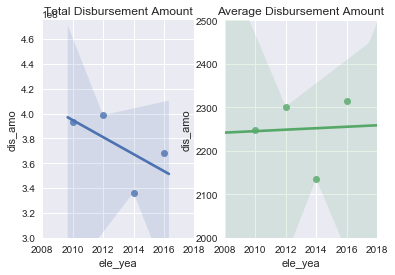

In [599]:
#Yearly Total Disbursment amount
yearBasedDisAmountSum=(sampledDataframe.groupby(['ele_yea']).agg({'dis_amo': 'sum'}).reset_index().copy())

#Yearly Average Disbursment amount
yearBasedDisAmountAvg=(sampledDataframe.groupby(['ele_yea']).agg({'dis_amo': 'mean'}).reset_index().copy())

# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(1,2)


sns.regplot(x=yearBasedDisAmountSum['ele_yea'], y=yearBasedDisAmountSum['dis_amo'], ax=ax1)
ax1.axis([2008,2018,300000000,475000000])
ax1.set_title('Total Disbursement Amount')
sns.regplot(x=yearBasedDisAmountAvg['ele_yea'], y=yearBasedDisAmountAvg['dis_amo'], ax=ax2)
ax2.axis([2008,2018,2000,2500])
ax2.set_title('Average Disbursement Amount')

#### Visualization: 2 Summary

Overall Disbursement is declining every year
Average disbursement has increasing trend

In [89]:
#Visualization: 2 Ends

#### Visualization: 3

In [565]:
#Category based distribution 
categoryBasedDF=(sampledDataframe.groupby(['cat_des']).agg({'dis_amo': 'mean','can_id': 'count'}).reset_index().copy())

In [566]:
#spliting the whole big category text into individual words and keep first word for indetification
splitCategory=pd.DataFrame(categoryBasedDF.cat_des.str.split(' ',0).tolist())
category=splitCategory[0]
amount=categoryBasedDF['dis_amo']

In [568]:
#viz category based disbursement
trace1 = go.Scatter(
    y = category,
    x = amount,
    mode='markers',
    #name=['A</br>', 'B</br>', 'C</br>', 'D</br>'],
    marker=dict(
        size='16',
        color = np.random.randn(500), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)

data = [trace1]
layout = dict(title = 'Amount Disbursement based on Category',
             xaxis = dict(title = 'Average Disbursement Amount'),
              yaxis = dict(title = 'Disbursement Categories'),
             )
fig = go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

Note: In this graph campaign show Campaign Event and Campaign Materials expenses

#### Visualization: 3 Summary
Category based yearly disbursement amount distribution is mostly below $20k on an average.

The highest disbursement amount is for Transfers category.

In [172]:
#Visualization: 3 Ends

#### Visualization: 4

In [512]:
#Disbursement amount each year
row2010=categoryBasedDF[['cat_des','dis_amo']][categoryBasedDF['ele_yea']==2010]
row2012=categoryBasedDF[['cat_des','dis_amo']][categoryBasedDF['ele_yea']==2012]
row2014=categoryBasedDF[['cat_des','dis_amo']][categoryBasedDF['ele_yea']==2014]
row2016=categoryBasedDF[['cat_des','dis_amo']][categoryBasedDF['ele_yea']==2016]
catArray=categoryBasedDF[['cat_des']][categoryBasedDF['ele_yea']==2010]

In [515]:
#Visualization: 4
len(row2010)

12

In [569]:
#Viz Disbursement amount each year on different categories

x = catArray['cat_des']
y1 = row2010['dis_amo']
y2 = row2012['dis_amo']
y3 = row2014['dis_amo']
y4 = row2016['dis_amo']

trace1 = go.Bar(
    x=x,
    y=y1,
    name='2010 expenditures',
    textposition = 'auto',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)')
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y2,
    name='2012 expenditures',
    textposition = 'auto',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)'
            ),
        ),
    opacity=0.6
)

trace3 = go.Bar(
    x=x,
    y=y3,
    name='2014 expenditures',
    textposition = 'auto',
    marker=dict(
        color='rgb(133, 133, 224)',
        line=dict(
            color='rgb(133, 133, 224)')
        ),
    opacity=0.6
)

trace4 = go.Bar(
    x=x,
    y=y4,
    name='2016 expenditures',
    textposition = 'auto',
    marker=dict(
        color='rgb(128, 170, 255)',
        line=dict(
            color='rgb(128, 170, 255)')
        ),
    opacity=0.6
)
layout = dict(title = 'Amount Disbursement based on Category for 2010-2016',
             yaxis = dict(title = 'Average Amount Disbursement'),
              xaxis = dict(title = 'Disbursement Categories'),
             )
data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### Visualization: 4 Summary

Tranfers and Loan Repayments shared the most amount of disbursement every year

It shows comparatively very high amount for year 2010 allocated for Trnasfer category which was reduced in consecutive years

#### Visualization: 5

In [263]:
#grouping of data based on Office State 
stateBasedDF=(sampledDataframe.groupby(['can_off_sta']).agg({'dis_amo': 'mean','can_id':'count','com_id':'count','rec_com_id':'count'}).reset_index().copy())

In [265]:
#Visualization: 5

In [266]:
for col in geo_temp.columns:
    stateBasedDF[col] = stateBasedDF[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

stateBasedDF['text'] = stateBasedDF['can_off_sta'] + '<br>' +\
    'Disburse Amount '+stateBasedDF['dis_amo'] + '<br>' +'Candidates '+stateBasedDF['can_id']+'<br>'+\
    'Recipient '+stateBasedDF['rec_com_id'] + '<br>' + 'Committee involved '+stateBasedDF['com_id']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = stateBasedDF['can_off_sta'],
        z = stateBasedDF['dis_amo'].astype(float),
        locationmode = 'USA-states',
        text = stateBasedDF['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2010-2016 Election money distribution across USA<br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### Visualization: 5 Summary

The above visualization provides statastics for disbursement amount, number of candidates, committees, recipients for each states across USA

States NV, CO, WI and MA have high average disbursement amount

#### Visualization: 6

In [373]:
#Number of unique candidates per each committee and their average disbursement amount
countPerCommittee=(sampledDataframe.groupby('com_nam').agg({'dis_amo': 'mean',"can_id": lambda x: x.nunique()}).reset_index().copy())

In [374]:
#Visualization: 6 

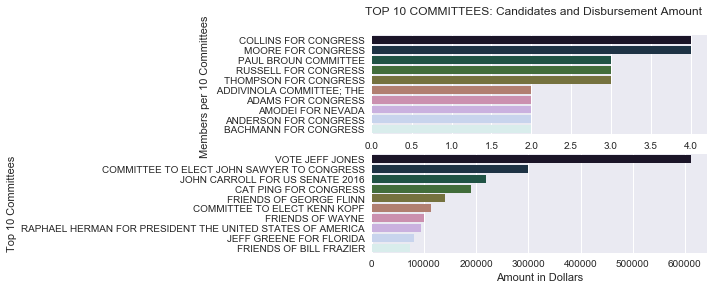

In [570]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Tell pointplot to plot on ax1 with the ax argument
sns.barplot(x="can_id", y="com_nam", data=countPerCommittee.nlargest(10, 'can_id'),palette='cubehelix',ax=ax1)

# Tell the barplot to plot on ax2 with the ax argument
sns.barplot(x="dis_amo", y="com_nam", data=countPerCommittee.nlargest(10, 'dis_amo'),palette='cubehelix',ax=ax2)

#set axis labels for both graphs
ax1.set(xlabel='Top 10 Committees', ylabel='Members per 10 Committees ')
ax2.set(xlabel='Amount in Dollars', ylabel='Top 10 Committees')

plt.suptitle('TOP 10 COMMITTEES: Candidates and Disbursement Amount') 

plt.show()

#### Visualization: 6 Summary
Graph one shows numbers of candidates for top 10 committees

Graph two shows numbers of average Disbursement amount for top 10 committees

In [379]:
#Visualization: 6 Ends

### Visualization: 7

In [572]:
#grouping by candidates in each year based on hom much amount is disbursed on their name
avg_can_dist=sampledDataframe.groupby(['can_nam', 'ele_yea']).agg({'dis_amo':'mean'}).reset_index()
avg2010=(avg_can_dist[['can_nam','dis_amo']][avg_can_dist['ele_yea']==2010]).sort_values(avg_can_dist.columns[2], ascending = False)
avg2012=(avg_can_dist[['can_nam','dis_amo']][avg_can_dist['ele_yea']==2012]).sort_values(avg_can_dist.columns[2], ascending = False)
avg2014=(avg_can_dist[['can_nam','dis_amo']][avg_can_dist['ele_yea']==2014]).sort_values(avg_can_dist.columns[2], ascending = False)
avg2016=(avg_can_dist[['can_nam','dis_amo']][avg_can_dist['ele_yea']==2016]).sort_values(avg_can_dist.columns[2], ascending = False)

In [573]:
#Visualization: 7 

In [574]:
trace1 = go.Scatter(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2010['dis_amo'].head(10),
    text = avg2010['can_nam'],
    name = '2010 Disbursement', # Style name/legend entry with html tags
    connectgaps=True
)
trace2 = go.Scatter(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2012['dis_amo'].head(10),
    name = '2012 Disbursement',
    text = avg2012['can_nam']
)
trace3 = go.Scatter(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2014['dis_amo'].head(10),
    text = avg2014['can_nam'],
    name = '2014 Disbursement', # Style name/legend entry with html tags
    connectgaps=True
)
trace4 = go.Scatter(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2016['dis_amo'].head(10),
    name = '2016 Disbursement',
    text = avg2016['can_nam']
)
layout = dict(title = 'Top 10 Candidates Disbursement in Each Year',
             xaxis = dict(title = 'Candidate Rank based in Disbursement Amount'),
              yaxis = dict(title = 'Disbursement Amount'),
             )
data = [trace1,trace2,trace3,trace4]
fig = dict(data=data,layout=layout)
py.offline.iplot(fig)

#### Visualization: 7 Summary

This graph shows top 10 candidates for every year by disbursement amount

#### Visualization: 8

In [575]:
officeTypeBasedDF=sampledDataframe.groupby(['can_off','ele_yea']).agg({'dis_amo':'mean'}).reset_index()

In [576]:
#each year amount distribution based on office type
off2010=officeTypeBasedDF[['can_off','ele_yea','dis_amo']][officeTypeBasedDF['ele_yea']==2010]
off2012=officeTypeBasedDF[['can_off','ele_yea','dis_amo']][officeTypeBasedDF['ele_yea']==2012]
off2014=officeTypeBasedDF[['can_off','ele_yea','dis_amo']][officeTypeBasedDF['ele_yea']==2014]
off2016=officeTypeBasedDF[['can_off','ele_yea','dis_amo']][officeTypeBasedDF['ele_yea']==2016]

In [577]:
#Visualization: 8

In [580]:
#Type of offices
officeTypes = (officeTypeBasedDF['can_off'].unique())
y1 = off2010['dis_amo']
y2 = off2012['dis_amo']
y3 = off2014['dis_amo']
y4 = off2016['dis_amo']

trace1 = go.Scatter(
    x=officeTypes,
    y=y1,
    text=['Office Type: Home</br>', 'Office Type: President</br>', 'Office Type: Senate</br>'],
    name = '2010 Disbursement', # Style name/legend entry with html tags
    #['A</br>size: 40</br>sixeref: 0.2', 'B</br>size: 60</br>sixeref: 0.2', 'C</br>size: 80</br>sixeref: 0.2', 'D</br>size: 100</br>sixeref: 0.2']
    marker=dict(
        size=[400, 600, 800, 1000],
        sizeref=.5,
        sizemode='area',
    )
)
trace2 = go.Scatter(
    x=officeTypes,
    y= y2,
    name = '2012 Disbursement',
    text=['Office Type: Home</br>', 'Office Type: President</br>', 'Office Type: Senate</br>'],
    marker=dict(
        size=[400, 600, 800, 1000],
        sizeref=.4,
        sizemode='area',
    )
)
trace3 = go.Scatter(
    x=officeTypes,
    y= y3,
    text=['Office Type: Home</br>', 'Office Type: President</br>', 'Office Type: Senate</br>'],
    name = '2014 Disbursement', # Style name/legend entry with html tags
    marker=dict(
        size=[400, 600, 800, 1000],
        sizeref=0.3,
        sizemode='area',
    )
)
trace4 = go.Scatter(
    x=officeTypes,
    y= y4,
    text=['Office Type: Home</br>', 'Office Type: President</br>', 'Office Type: Senate</br>'],
    name = '2016 Disbursement', 
    marker=dict(
        size=[400, 600, 800, 1000],
        sizeref=0.2,
        sizemode='area',
    )
)
layout = dict(title = 'Amount Disbursement based on Candidate Office for 2010-2016',
             yaxis = dict(title = 'Average Amount Disbursed'),
             xaxis = dict(title = 'Office Categoty of Candidates')
             )

data = [trace1, trace2, trace3, trace4]
fig = dict(data=data,layout=layout)
py.offline.iplot(fig)

#### Visualization: 8

It shows there is equal disbursement amount in each candidates' for office types

Usually, there are less money involved in Home type offices 

Average amount disbursed in Presindential office is on decline

In [423]:
#Visualization: 8 Ends

#### Visualization: 9

In [581]:
recipientDF=sampledDataframe.groupby(['rec_sta']).agg({'dis_amo':'mean'}).reset_index()
CandidatesDF=sampledDataframe.groupby(['can_off_sta']).agg({'dis_amo':'mean'}).reset_index()

In [582]:
statesColDF = pd.merge(recipientDF, CandidatesDF, how='left', left_on=['rec_sta'], right_on=['can_off_sta'])

In [583]:
#Visualization: 9 

In [584]:
y=statesColDF['rec_sta'][statesColDF['rec_sta'].str.len()==2]
x1=statesColDF['dis_amo_x'][statesColDF['dis_amo_x']>0]
x2=statesColDF['dis_amo_y'][statesColDF['dis_amo_y']>0]

trace1 = go.Bar(
    y=y,
    x=x1,
    name='Disbursed Amount',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 1)
    )
)
trace2 = go.Bar(
    y=y,
    x=x2,
    name='Received Amount',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 1)
        
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Disbursed and Received amount Based on Office State Locations',
    xaxis = dict(title = 'Average Amount Disbursed and Received'),
    yaxis = dict(title = 'States')
)


fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### Visualization: 9 Summary

This visualization shows the amount disbusred from states and to states. 

It shows AL-Alabama received maximum amount of fund

Orange Country, California disbursed maximum amount of fund over years but received hardly any amount

In [444]:
#Visualization: 9 Ends

#### Visualization: 10

In [585]:
# State based average disbursed amount and candidate count
overallDistribution=sampledDataframe.groupby(['can_off_sta']).agg({'dis_amo':'mean','can_id': lambda x: x.nunique()}).reset_index().copy()

In [586]:
#Visualization: 10

In [587]:
y=overallDistribution['dis_amo']
z=overallDistribution['can_id']
x=overallDistribution['can_off_sta']
#x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]

layout = go.Layout(
                    scene = dict(
                    #domain='Disbursement based on total number of candidtaes in Each States',
                    xaxis = dict(
                        title='States'),
                    yaxis = dict(
                        title='Number ofCandidates'),
                    zaxis = dict(
                        title='Disbursement Amount'),),
                    width=700,
                    margin=dict(
                    r=0, b=0,
                    l=0, t=0)
)

fig = go.Figure(data=data,layout=layout)
py.offline.iplot(fig)
#Please note: 3d doesn't allow title

##### Please note: 3d doesn't allow title

#### Visualization: 10 

Shows 3D presentation of how data distributed with respect to states, number of candidates and disbursed amount

California, Texas and Florida have more number of candidates with respect to other states

Hawaii, Colorado and Massachusetts have more average disbursed amount with respect to other states


In [590]:
 #Visualization: 10 Ends

#### Visualization: 11

In [591]:
#grouping by candidates in each year based on hom much amount is disbursed on their name
avg_com_dist=sampledDataframe.groupby(['com_nam', 'ele_yea']).agg({'dis_amo':'mean'}).reset_index()
avg2010=(avg_com_dist[['com_nam','dis_amo']][avg_com_dist['ele_yea']==2010]).sort_values(avg_com_dist.columns[2], ascending = False)
avg2012=(avg_com_dist[['com_nam','dis_amo']][avg_com_dist['ele_yea']==2012]).sort_values(avg_com_dist.columns[2], ascending = False)
avg2014=(avg_com_dist[['com_nam','dis_amo']][avg_com_dist['ele_yea']==2014]).sort_values(avg_com_dist.columns[2], ascending = False)
avg2016=(avg_com_dist[['com_nam','dis_amo']][avg_com_dist['ele_yea']==2016]).sort_values(avg_com_dist.columns[2], ascending = False)

In [592]:
#Visualization: 11 

In [594]:
trace1 = go.Bar(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2010['dis_amo'].head(10),
    text = avg2010['com_nam'],
    name = '2010 Disbursement',
    marker=dict(
        color='rgb(133, 133, 173)'
    )
)
trace2 = go.Bar(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2012['dis_amo'].head(10),
    text = avg2012['com_nam'],
    name = '2012 Disbursement',
    marker=dict(
        color='rgb(77, 0, 153)'
    )
)
trace3 = go.Bar(
   x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2014['dis_amo'].head(10),
    text = avg2014['com_nam'],
    name = '2014 Disbursement',
    marker=dict(
        color='rgb(142, 124, 195)'
    )
)
trace4 = go.Bar(
    x=[1,2,3,4,5,6,7,8,9,10],
    y=avg2016['dis_amo'].head(10),
    text = avg2016['com_nam'],
    name = '2016 Disbursement',
    marker=dict(
        color='rgb(0, 134, 179)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Top 10 Committes: Disbursement Amount for 2010-2016',
    xaxis=dict(
        title='Committee Ranking based on Disbursement',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Disbursed Amount in USD',
    
    ),
    legend=dict(
        x=0.82,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### Visualization: 11 Summary

It shows the top 10 committees based on their dismbursement amount ranking

Each of those committees disbusred most amount of money in year 2016

In [596]:
#Visualization: 11 Ends

NameError: name 'avg_com_dist' is not defined